In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('vitrina.csv')
df

,Phone_new,Кол-во чеков,LastOrderDate,Quant,RowDiscount,Общая сумма чеков,Source_Колл-центр,Source_Онлайн-Резерв.,Source_Сайт,Source_Терминал,...,TN_Крупная бытовая техника,TN_Мебель,TN_Мелкая бытовая техника,TN_Сделай сам,TN_Спорт и активный отдых,TN_ТВ-Аудио,TN_Товары для дома,TN_Цифровая Техника,Среднее кол-во товаров в чеке,Средняя сумма в чеке
0,32565748-000000000,8,2016/4/26,8,0,19757,0,0,0,8,...,0.125,0.0,0.125,0.0,0.0,0.25,0.0,0.0,1.0,2469.625
1,32565750-575448565151 а,1,2016/3/31,2,0,26599,2,0,0,0,...,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.0,2.0,13299.500
2,32565750-575448565151 а5,1,2016/4/12,1,0,1590,0,1,0,0,...,0.000,0.0,1.000,0.0,0.0,0.00,0.0,0.0,1.0,1590.000
3,43553240-575054413251+75,2,2016/4/9,2,0,10129,0,2,0,0,...,0.000,0.0,0.500,0.0,0.0,0.00,0.0,0.0,1.0,5064.500
4,55445748-514957495657715,1,2016/4/28,1,0,27449,0,1,0,0,...,1.000,0.0,0.000,0.0,0.0,0.00,0.0,0.0,1.0,27449.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88142,57495456-56485151574991,1,2016/3/14,1,0,1609,0,1,0,0,...,0.000,0.0,1.000,0.0,0.0,0.00,0.0,0.0,1.0,1609.000
88143,57505548-48535350504991,1,2016/3/6,1,0,999,0,0,1,0,...,0.000,0.0,1.000,0.0,0.0,0.00,0.0,0.0,1.0,999.000
88144,57555656-55575253555698,1,2016/4/19,1,0,3850,0,1,0,0,...,0.000,0.0,1.000,0.0,0.0,0.00,0.0,0.0,1.0,3850.000
88145,57565352-52575050555092,1,2016/3/2,1,591,2590,0,1,0,0,...,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.0,1.0,2590.000


In [4]:
df['Phone_new'].nunique(), df.shape[0]

(88147, 88147)

In [5]:
df.columns

Index(['Phone_new', 'Кол-во чеков', 'LastOrderDate', 'Quant', 'RowDiscount',
       'Общая сумма чеков', 'Source_Колл-центр', 'Source_Онлайн-Резерв.',
       'Source_Сайт', 'Source_Терминал', 'PaymentType_Безналичная',
       'PaymentType_Кредит в магазине', 'PaymentType_Наличные', 'Area_ДФО',
       'Area_ПФО', 'Area_СЗФО', 'Area_СФО', 'Area_УФО', 'Area_ЦФО', 'Area_ЮФО',
       'TN_Автотовары', 'TN_Аксессуары', 'TN_Детские товары',
       'TN_Игры, софт и развлечения', 'TN_Климат',
       'TN_Крупная бытовая техника', 'TN_Мебель', 'TN_Мелкая бытовая техника',
       'TN_Сделай сам', 'TN_Спорт и активный отдых', 'TN_ТВ-Аудио',
       'TN_Товары для дома', 'TN_Цифровая Техника',
       'Среднее кол-во товаров в чеке', 'Средняя сумма в чеке'],
      dtype='object')

* Recency - LastOrderDate (последний день покупки)
* Frequency - Кол-во чеков
* Monetary - Общая сумма чеков

In [6]:
rfm_df = df[['LastOrderDate', 'Кол-во чеков', 'Общая сумма чеков']]
rfm_df = rfm_df.sort_values(['LastOrderDate', 'Кол-во чеков', 'Общая сумма чеков'])

In [10]:
rfm_df['LastOrderDate'] = pd.to_datetime(rfm_df['LastOrderDate'])
rfm_df.LastOrderDate.max()

Timestamp('2016-04-30 00:00:00')

In [12]:
day = pd.to_datetime('2016-04-30')
rfm_df['Recency'] = (day - rfm_df['LastOrderDate']).dt.days
rfm_df

,LastOrderDate,Кол-во чеков,Общая сумма чеков,Recency
87622,2016-03-01,1,219,60
1248,2016-03-01,1,220,60
59900,2016-03-01,1,220,60
16530,2016-03-01,1,229,60
10909,2016-03-01,1,240,60
...,...,...,...,...
13237,2016-04-09,12,79589,21
35988,2016-04-09,16,224636,21
480,2016-04-09,20,179879,21
81220,2016-04-09,21,146114,21


In [13]:
rfm = rfm_df[['Кол-во чеков', 'Общая сумма чеков', 'Recency']]
rfm = rfm.rename(columns = {"Кол-во чеков": "Frequency", "Общая сумма чеков": "Monetary"})

In [14]:
rfm

,Frequency,Monetary,Recency
87622,1,219,60
1248,1,220,60
59900,1,220,60
16530,1,229,60
10909,1,240,60
...,...,...,...
13237,12,79589,21
35988,16,224636,21
480,20,179879,21
81220,21,146114,21


In [15]:
num_cluster = 3
rfm['R'] = pd.qcut(rfm['Recency'], num_cluster, labels=False) + 1
rfm['F'] = (num_cluster - 1) - pd.qcut(rfm['Frequency'].rank(method='first'), num_cluster, labels=False) + 1
rfm['M'] = (num_cluster - 1) - pd.qcut(rfm['Monetary'], num_cluster, labels=False) + 1
rfm['RFMGroup'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)
rfm

,Frequency,Monetary,Recency,R,F,M,RFMGroup
87622,1,219,60,3,3,3,333
1248,1,220,60,3,3,3,333
59900,1,220,60,3,3,3,333
16530,1,229,60,3,3,3,333
10909,1,240,60,3,3,3,333
...,...,...,...,...,...,...,...
13237,12,79589,21,2,1,1,211
35988,16,224636,21,2,1,1,211
480,20,179879,21,2,1,1,211
81220,21,146114,21,2,1,1,211


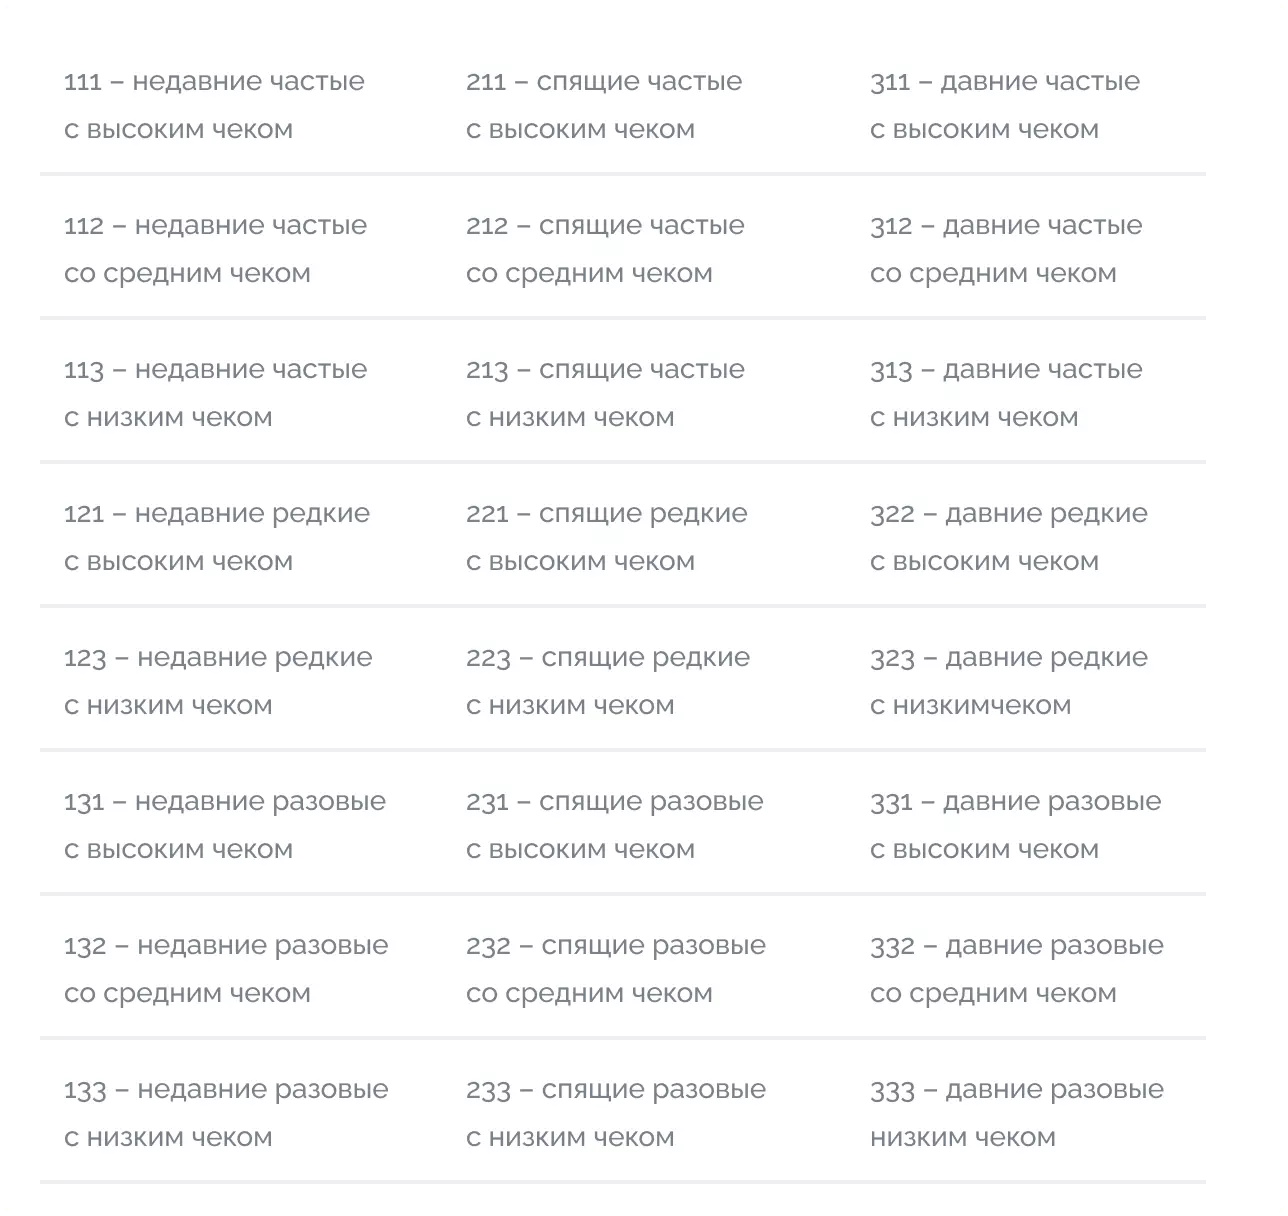

[source_1](https://vc.ru/marketing/283470-vse-po-polochkam-bolshoy-gayd-po-rfm-analizu-klientskoy-bazy), [source_habr](https://habr.com/ru/articles/665972/)

In [16]:
segment_dict = {'VIP': [111],
                'Лояльные' : [112, 113, 121, 122],
                'Новенькие': [123, 131, 132, 133],
                'Спящие': [223, 231, 232, 233, 211, 212, 213, 221, 222],
                'Уходящие': [311, 312, 313, 321, 322],
                'Потерянные': [323, 331, 332, 333]}

In [17]:
rfm = rfm.sort_values(by = 'RFMGroup')
rfm_analysis = pd.DataFrame(rfm.RFMGroup.value_counts(sort = False)).reset_index()
rfm_analysis = rfm_analysis.rename(columns = {'RFMGroup': 'count', 'index': 'RFMGroup'})
rfm_analysis['Segment'] = np.nan
for segment, codes in segment_dict.items():
    for code in codes:
        rfm_analysis.loc[rfm_analysis['RFMGroup'] == str(code), 'Segment'] = segment
rfm_analysis = rfm_analysis.merge(rfm.groupby(by = 'RFMGroup').mean()[['Recency', 'Frequency', 'Monetary']].reset_index(), on = 'RFMGroup')
rfm_analysis

,RFMGroup,count,Segment,Recency,Frequency,Monetary
0,111,6585,VIP,6.163857,2.392103,39542.860744
1,112,5717,Лояльные,5.769984,1.182788,5919.483121
2,113,5068,Лояльные,5.090371,1.078927,1705.729084
3,121,3415,Лояльные,14.789751,1.000000,21298.755490
4,122,4135,Лояльные,14.951874,1.000000,5776.401693
5,123,4826,Новенькие,14.622669,1.000000,1694.694157
6,211,4115,Спящие,26.163548,1.539733,27025.121750
7,212,3635,Спящие,25.183494,1.204402,5908.998624
8,213,3110,Спящие,24.665273,1.097428,1690.924116
9,221,2017,Спящие,27.085771,1.000000,21479.857214


In [18]:
new_df = pd.merge(df, rfm['RFMGroup'], left_index=True, right_index=True)
new_df = new_df.groupby('RFMGroup').mean().reset_index()
new_df = new_df.merge(rfm_analysis.drop(['Monetary', 'Recency', 'Frequency'], axis=1), on='RFMGroup')
new_df = new_df.drop('RFMGroup', axis = 1)
new_df = new_df.groupby('Segment').mean()
new_df

<ipython-input-18-df2ffd4589ae>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = new_df.groupby('RFMGroup').mean().reset_index()


,Кол-во чеков,Quant,RowDiscount,Общая сумма чеков,Source_Колл-центр,Source_Онлайн-Резерв.,Source_Сайт,Source_Терминал,PaymentType_Безналичная,PaymentType_Кредит в магазине,...,TN_Мебель,TN_Мелкая бытовая техника,TN_Сделай сам,TN_Спорт и активный отдых,TN_ТВ-Аудио,TN_Товары для дома,TN_Цифровая Техника,Среднее кол-во товаров в чеке,Средняя сумма в чеке,count
Segment,,,,,,,,,,,,,,,,,,,,,
VIP,2.392103,2.875778,542.436295,39542.860744,0.272285,2.504328,0.015034,0.010326,0.419134,0.127259,...,0.017221,0.118122,0.081814,0.082872,0.102934,0.011510,0.113684,1.256822,16645.585566,6585.00
Лояльные,1.065429,1.267289,43.661862,8675.092347,0.199142,0.983088,0.023467,0.004738,0.295908,0.026287,...,0.044012,0.245172,0.123319,0.092878,0.045901,0.026203,0.075396,1.183469,7700.787907,4583.75
Новенькие,1.000000,1.160796,3.086407,1694.694157,0.134894,0.873394,0.043514,0.009324,0.230626,0.008081,...,0.057363,0.330743,0.081538,0.117212,0.021446,0.067723,0.038127,1.160796,1613.439529,4826.00
Потерянные,1.000000,1.147167,177.773292,7583.046141,0.141361,0.895839,0.059245,0.005674,0.271389,0.016415,...,0.059884,0.244121,0.084294,0.067692,0.060162,0.053562,0.120301,1.147167,7013.020928,4842.75
Спящие,1.093507,1.295482,131.487234,10283.518156,0.186506,1.015782,0.031025,0.005561,0.296003,0.024209,...,0.056590,0.220042,0.093597,0.092114,0.056740,0.034231,0.105976,1.176122,8490.333436,3394.00
Уходящие,1.674684,2.004034,628.457975,13828.558294,0.247986,1.525337,0.108164,0.011201,0.426424,0.029866,...,0.059606,0.201159,0.076305,0.064624,0.053475,0.050366,0.154580,1.184704,8339.508531,1696.80


#### Анализ сегментов по товарам в долях

In [19]:
segments_by_tn = new_df[['TN_Автотовары', 'TN_Аксессуары', 'TN_Детские товары',
       'TN_Игры, софт и развлечения', 'TN_Климат',
       'TN_Крупная бытовая техника', 'TN_Мебель', 'TN_Мелкая бытовая техника',
       'TN_Сделай сам', 'TN_Спорт и активный отдых', 'TN_ТВ-Аудио',
       'TN_Товары для дома', 'TN_Цифровая Техника']]
segments_by_tn = round(segments_by_tn * 100)
segments_by_tn

,TN_Автотовары,TN_Аксессуары,TN_Детские товары,"TN_Игры, софт и развлечения",TN_Климат,TN_Крупная бытовая техника,TN_Мебель,TN_Мелкая бытовая техника,TN_Сделай сам,TN_Спорт и активный отдых,TN_ТВ-Аудио,TN_Товары для дома,TN_Цифровая Техника
Segment,,,,,,,,,,,,,
VIP,0.0,3.0,6.0,0.0,2.0,36.0,2.0,12.0,8.0,8.0,10.0,1.0,11.0
Лояльные,0.0,7.0,10.0,0.0,2.0,15.0,4.0,25.0,12.0,9.0,5.0,3.0,8.0
Новенькие,0.0,15.0,8.0,1.0,2.0,3.0,6.0,33.0,8.0,12.0,2.0,7.0,4.0
Потерянные,0.0,11.0,6.0,1.0,2.0,12.0,6.0,24.0,8.0,7.0,6.0,5.0,12.0
Спящие,0.0,8.0,8.0,0.0,2.0,16.0,6.0,22.0,9.0,9.0,6.0,3.0,11.0
Уходящие,0.0,12.0,5.0,0.0,1.0,16.0,6.0,20.0,8.0,6.0,5.0,5.0,15.0


### Анализ сегментов по фо

In [21]:
segments_by_area = new_df[['Area_ДФО',
       'Area_ПФО', 'Area_СЗФО', 'Area_СФО', 'Area_УФО', 'Area_ЦФО', 'Area_ЮФО']]
segments_by_area['All'] = segments_by_area.sum(axis = 1)
segments_by_area[['Area_ДФО', 'Area_ПФО', 'Area_СЗФО', 'Area_СФО', 'Area_УФО', 'Area_ЦФО',
       'Area_ЮФО']] = round(segments_by_area[['Area_ДФО', 'Area_ПФО', 'Area_СЗФО', 'Area_СФО', 'Area_УФО', 'Area_ЦФО',
       'Area_ЮФО']].apply(lambda x: x * 100 /x.sum(), axis=1), 2)
segments_by_area = segments_by_area.drop('All', axis=1)
segments_by_area

<ipython-input-21-0a7b7f90924b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segments_by_area['All'] = segments_by_area.sum(axis = 1)
<ipython-input-21-0a7b7f90924b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segments_by_area[['Area_ДФО', 'Area_ПФО', 'Area_СЗФО', 'Area_СФО', 'Area_УФО', 'Area_ЦФО',


,Area_ДФО,Area_ПФО,Area_СЗФО,Area_СФО,Area_УФО,Area_ЦФО,Area_ЮФО
Segment,,,,,,,
VIP,0.05,10.05,30.25,3.49,3.43,49.87,2.86
Лояльные,0.03,10.49,24.83,4.54,2.79,53.95,3.37
Новенькие,0.06,10.02,25.37,5.10,2.25,53.68,3.53
Потерянные,0.03,9.94,23.89,4.63,2.92,55.45,3.14
Спящие,0.06,11.14,24.32,4.91,2.90,53.18,3.49
Уходящие,0.01,11.57,25.44,3.51,2.67,53.41,3.38


#### Анализ сегментов по чекам

In [23]:
segments_by_check = round(new_df[['Кол-во чеков', 'Общая сумма чеков', 'Среднее кол-во товаров в чеке', 'Средняя сумма в чеке', 'count']])
segments_by_check

,Кол-во чеков,Общая сумма чеков,Среднее кол-во товаров в чеке,Средняя сумма в чеке,count
Segment,,,,,
VIP,2.0,39543.0,1.0,16646.0,6585.0
Лояльные,1.0,8675.0,1.0,7701.0,4584.0
Новенькие,1.0,1695.0,1.0,1613.0,4826.0
Потерянные,1.0,7583.0,1.0,7013.0,4843.0
Спящие,1.0,10284.0,1.0,8490.0,3394.0
Уходящие,2.0,13829.0,1.0,8340.0,1697.0


In [26]:
segment_analysis = rfm_analysis.groupby('Segment').agg({'count':'sum',
                         'Recency':'mean',
                         'Frequency':'mean',
                         'Monetary':'mean'})
segment_analysis['%'] = round(segment_analysis['count'] / rfm_df.shape[0] * 100, 2)
segment_analysis

,count,Recency,Frequency,Monetary,%
Segment,,,,,
VIP,6585,6.163857,2.392103,39542.860744,7.47
Лояльные,18335,10.150495,1.065429,8675.092347,20.80
Новенькие,4826,14.622669,1.000000,1694.694157,5.47
Потерянные,19371,51.340149,1.000000,7583.046141,21.98
Спящие,30546,29.922177,1.093507,10283.518156,34.65
Уходящие,8484,52.360433,1.674684,13828.558294,9.62


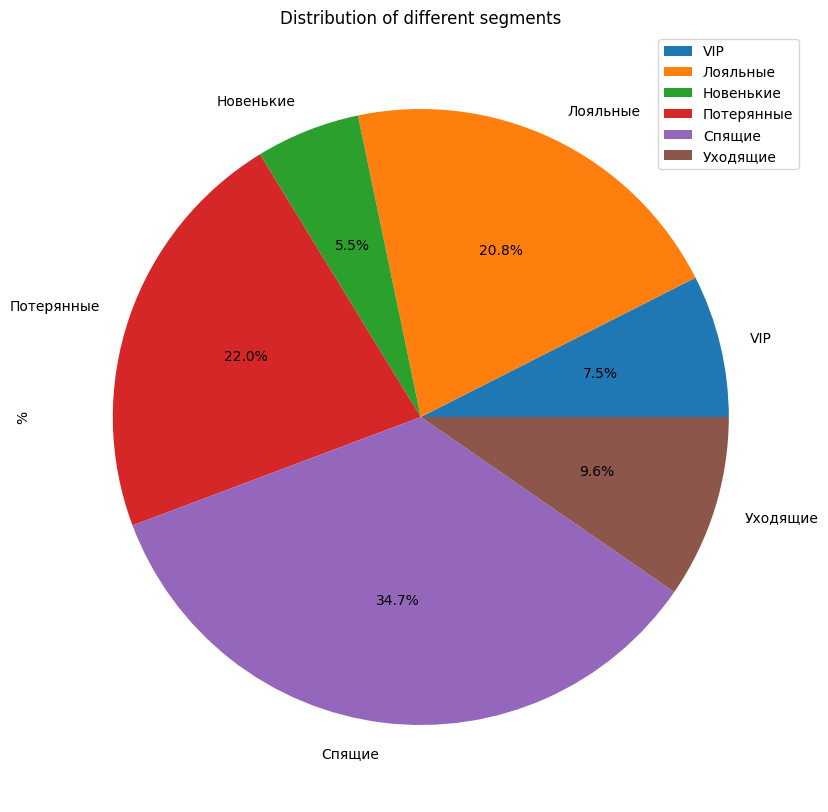

In [27]:
segment_analysis.plot.pie(y='%', autopct='%1.1f%%', figsize=(10, 10))
plt.title("Distribution of different segments")
plt.show()